3.11.11 (main, Dec  4 2024, 08:55:07) [GCC 11.4.0]


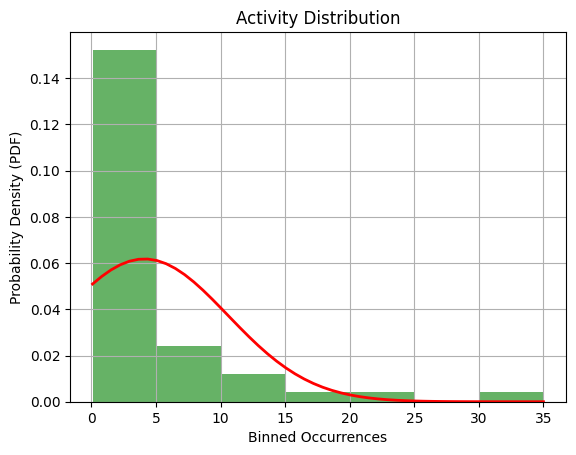

In [125]:
def todo(self):
  # List of primary issues
  # todo    description                                   hours   progress      Note
  #
  # todo0   A01.csv skate, long, downhill, juggling,      44.5      Processing    rgb_unique_bin
  #         running mean duration by category.
  #
  # todo1   A01.csv category by day of the week or
  #         time of day i.e. morning, afternoon, night
  #         or blocks of 3.
  #
  # todo2   A0.csv nltk the 'Explanation' and 'Notes'
  #         sections? Manual descriptions are already
  #         included in the write-up.
  #
  # todo3   Another tutorial chapter on merge sort.
  #         Compare with Python's built-in len(),
  #         sort(), and replace().
  #
  # todo4   The graphing part could be included in
  #         Chapter 1 with pandas and SciPy.
  #
  # todo5   A01.csv longboard distance, running
  #         distance per day were not recorded well.
  #
  # todo6   P0P1B0B1.csv timeseries graphing.             45.5     Completed
  #
  # todo7   P1.csv manual vs observed prediction
  #         accuracy F1 or RMSE.
  #
  # todo8   B01.csv Pearson-Correlation and day-          2        Completed    Found that there was not correlation between parametric variables.
  #         delayed between calories, alcohol, exercise.                        An index similar to ENSO is redundant since there were no consecutive
  #                                                                             observations over 4 alcohol or excessive (calorie - calorie burned).
  #
  # todo9   A01P01B01 moving window spearman correlation           Processing   Would have to sort these for rank, which was started in todo0.
  #         between activity, duration, time of day, pain,
  #         nutrients, calories, alcohol.
  #
  # todo10  tbd data filling and automatic predictions.
  #         idk if thats another chapter or avoided.
  #
  # todo11  Manual weather observations and PRISM data
  #         will be in a different GitHub to avoid confusion.
  #
  # Time spent at a computer programming
  # Total estimate  :
  # Total actual    :
  #
  # Purpose
  # The goal of writing this is to waste as much time as possible in between
  # skateboarding, lifting, or exercise to avoid overtraining while retaining
  # logical thought process during long stretches of unemployment. These were
  # written on a computer with a 1.5-2 hour battery to restrict excessive
  # programming by limiting hardware access.
  #
  # Abstract
  # No library Python with C-like syntax is used for data manipulation and
  # graphing whereby arrays are handled without dictionaries. The only
  # library used is Matplotlib for RGB graphing and to avoid writing a image or
  # video format that would likely spread misinformation. An implementation of
  # the merge sort algorithm was used to alphabetize exercise activity for
  # binning and graphing frequency by unique type. The built-in Python methods
  # for 'replace', 'split', 'len', and 'sort' were manually written for
  # learning purposes.

  # Start date: 20250125
  # End date:

  # Below is an exhaustive list of secondary issues.

  # List of secondary issues
  # todo   description                                                  progress
  # todo0  rewrite parser for unicode csv str/int.
  # todo1  Stats class avoid NA, NAAN, -9999, etc.
  # todo2  refractor RGB_graphs.
  # todo3  monthly means on bar graphs.
  # todo4  organize merge_sort into another classe.                     Complete
  # todo5  modify merge sort to accept entire CSV.                      Class
  # todo6  Handle multi word activity descriptions consistently.        Class
  # todo7  switch the second capital letter to lower case if exists.    Class
  # todo8  unchain the four merge sort functions.                       Class

  return

import sys
import matplotlib.pyplot as plt
print(sys.version)
# 3.10.12 (main, Mar 22 2024, 16:50:05) [GCC 11.4.0]
# 3.11.11 (main, Dec  4 2024, 08:55:07) [GCC 11.4.0]

# Interesting method to print callable methods on an object.
# print(dir(left_right))
# Example is obj.__class__ that prints the data type without using the type(obj) method
# type_check = str(left_right.__class__)

#####################################################################################
# Part A: CSV or TSV parser class to open the file and parse the values into a list #
#####################################################################################
class CSV_Parser:
  # Initialize the input variables
  def __init__(self, data_path):
    self.data_path = data_path
  def file_opener(self):
    with open(self.data_path, "r") as data_open:
      data_read = data_open.read()
      return data_read
  # Index the commas and line breaks
  def comma_index(self, open_file, path, column_len):
    data_comma_place = [0]
    column_pl_len = 0
    path_split = [ext for ext in path]
    path_ext = "".join(path_split[-3:])
    for i in range(len(open_file)):
      data1_col1 = open_file[i]
      if path_ext == "csv":
        if data1_col1 == ",":
          data_comma_place.append(i)
          data_comma_place.append(i+1)
      elif path_ext == "tsv":
        if data1_col1 == "\t":
          data_comma_place.append(i)
          data_comma_place.append(i+1)
      if data1_col1 == "\n":
        data_comma_place.append(i)
        data_comma_place.append(i+1)
        # If you want to use the function to get the column width, set to 1
        if column_len == 1:
          col_width = len(data_comma_place)
          return col_width
          break
    last_val = data_comma_place[-1] + 2
    data_comma_place.append(last_val)
    return data_comma_place
  # Splitting the csv characters into list of words based on indexed comma position
  def csv_value_list(self, data_comma_out, open_file, col_width, col_head):
    j = col_head
    data_val_list = []
    for i in range(len(data_comma_out)):
      if j >= len(data_comma_out):
        break
      comma_strt = data_comma_out[j]
      j += 1
      comma_end = data_comma_out[j]
      #print(comma_strt, "and ", comma_end)
      j += 1
      data_val_list.append(open_file[comma_strt:comma_end])
      j = j + (col_width * 2)
    return data_val_list
  # Flipping the columns from high to low for readability
  # If the original value was 5, set it to equal 0 (no pain)
  # If the original value was 0, set it to equal to 5 (high pain) etc.
  # If none of those things are true, append the string (for the column header)
  def csv_flipper(self, csv_list, col_width):
    csv_flipped = []
    for i in csv_list:
      if i == str(5):
        n = str(1)
        csv_flipped.append(n)
      elif i == str(4):
        n = str(2)
        csv_flipped.append(n)
      elif i == str(3):
        n = str(3)
        csv_flipped.append(n)
      elif i == str(2):
        n = str(4)
        csv_flipped.append(n)
      elif i == str(1):
        n = str(5)
        csv_flipped.append(n)
      else:
        csv_flipped.append(i)
    return csv_flipped

######################################################
# Part B: Get descriptive statistics of each column. #
######################################################
class Statistics:
  # Returns a dictionary with the header and mean
  def mu(self, col_list):
    total = 0
    counter = 0
    # Column has to have a header
    for i in col_list[1:]:
      if i == "NA":
        continue
      total = total + float(i)
      counter += 1
    mean = total / counter
    header_mean = [col_list[0], mean]
    return header_mean
  # Returns the 2-4 moment of the distribution
  # Different than Google Sheets sample vs population
  def mnt(self, header, mean, col_list):
    col_1 = len(col_list) - 1
    stn = 0
    skew = 0
    kurt = 0
    counter = 0
    for i in col_list[1:]:
      if i == "NA":
        continue
      # secondary todo: doesn't work with decimals
      n1 = int(i) - mean
      n1_sqr = n1 ** 2
      n1_cube = n1 ** 3
      n1_quad = n1 ** 4
      stn = stn + n1_sqr
      skew = skew + n1_cube
      kurt = kurt + n1_quad
      counter += 1
    # Sample variance (n-1)
    # Population variance (n)
    counter = (counter - 1)
    stn_small_sqr = float(stn) / counter
    stn_small = stn_small_sqr ** .5
    skew_small_sqr = float(skew) / counter
    skew_small = skew_small_sqr / (stn_small ** 3)
    kurt_small_sqr = float(kurt) / counter
    kurt_small = kurt_small_sqr / (stn_small ** 4)
    return [header, stn_small, skew_small, kurt_small]
  # Covariance and correlation
  def covar(self, x_mean, y_mean, col_1_list, col_2_list):
    col_len = len(col_1_list) - 1
    covar = 0
    x1y1_sum = 0
    counter = 0
    for i in range(col_len):
      #if i == col_len-2:
      #  break
      if col_1_list[i+1] == "NA":
        continue
      if col_2_list[i+1] == "NA":
        continue
      # print(i+3,i)
      # print("x_mean: ", x_mean[1], "x_value: ", col_1_list[i+1])
      x1 = float(col_1_list[i+1]) - x_mean[1]
      y1 = float(col_2_list[i+1]) - y_mean[1]
      x1y1 = x1 * y1
      x1y1_sum = x1y1_sum + x1y1
      counter += 1
    covar = x1y1_sum / counter
    return covar
  def cor(self, covar, col_1_stnd, col_2_stnd):
    stnd12 = col_1_stnd * col_2_stnd
    cor = covar / stnd12
    return cor

######################################################
# Part C: Data visualization with a timeseries graph #
######################################################
# 'Graph' class accepts three variables: verticle arranged 'data',
# the date column'date_col_num', and the data column 'data_col_num'
class Graph:
  # Initialize the input variables
  def __init__(self, data, date_col_num, data_col_num):
    self.data = data
    self.date_col_num = date_col_num
    self.data_col_num = data_col_num
  def hi_lo(self, data_col_num):
    # The date and date column to be used
    data_col = self.data[data_col_num]
    data_col_len = len(data_col)
    # High and low of values
    hi_lo_count = 1
    hi = data_col[1]
    lo = data_col[1]
    for e in range(len(data_col[1:])):
      hi_lo_count += 1
      if hi_lo_count == (len(data_col[1:]) + 1):
        break
      if hi < data_col[hi_lo_count]:
        hi = data_col[hi_lo_count]
      if lo > data_col[hi_lo_count]:
        lo = data_col[hi_lo_count]
    return [hi, lo]
  def binned(self, hi_lo):
    # high value (5 in this case or hi_lo[0])
    # The date and date column to be used
    # TODO it works but is not resuable for other data ranges
    date_col = self.data[self.date_col_num]
    data_col = self.data[self.data_col_num]
    data_col_len = len(data_col)

    fiver = []
    fourer = []
    threer = []
    twoer = []
    oner = []
    lol_stm_date = []
    counter = 1
    # Binned with date value
    for i in range(data_col_len):
      P0_column = self.data[self.data_col_num]
      if counter == len(self.data[0]):
        break
      # secondary todo:
      if P0_column[counter] == "NA":
        counter += 1
        continue
      if float(P0_column[counter]) == 5:
        fiver.append([date_col[counter], P0_column[counter]])
      elif float(P0_column[counter]) == 4:
        fourer.append([date_col[counter], P0_column[counter]])
      elif float(P0_column[counter]) == 3:
        threer.append([date_col[counter], P0_column[counter]])
      elif float(P0_column[counter]) == 2:
        twoer.append([date_col[counter], P0_column[counter]])
      elif float(P0_column[counter]) == 1:
        oner.append([date_col[counter], P0_column[counter]])
      counter += 1
    # Combining the binned data into one dictionary
    lol_date_stm = [fiver, fourer, threer, twoer, oner]
    return lol_date_stm

  def time_series(self, date_hi_lo, lol_date_stm):
    date_col = self.data[self.date_col_num]
    # Base of the month, plus 00 i.e. 500
    date_base = int(date_hi_lo[1]) - 1
    # The number of spaces is the 'day' (date - month) - 'prev_day_space_int'
    # The difference between the values is multiplied by ' ' for each 5,4,3,2,1
    # Value with a '+' character marking the position
    spacer = []
    prev_day_space_int = 0
    for i in lol_date_stm:
      spacer_mid = []
      for ii in i:
        # ii is [date, value] in order
        # an if else statement
        # 7 starts at 22, 31 days
        # 8 30 days
        # 9 30 days
        # 10 31 days
        day = int(ii[0]) - date_base
        # print(day)
        day_count = day - prev_day_space_int
        day_space_str = ((day_count-1)*2) * " "
        spacer_mid.append(day_space_str)
        prev_day_space_int = day
      prev_day_space_int = 0
      spacer.append(spacer_mid)
    y_val = [y for y in range(len(spacer),0,-1)]
    return [spacer, y_val]
  def time_series_print(self,spacer,y_val):
    date_col = self.data[self.date_col_num]
    for j,k in zip(spacer,y_val):
      # y values
      print(k,end=" ")
      for l in j:
        print(l,end="")
        print("+",end=" ")
      print()
    # x values
    for m in range(len(date_col[0])-1):
      print("  ",end="")
      for n in date_col[1:]:
        print(n[m], end=" ")
      print()
    return
  def time_series_write(self,header,txt_out,spacer,y_val):
    # Open the output file location and write data to the txt
    date_col = self.data[self.date_col_num]
    file_output = open(txt_out, "w")
    file_output.write(header)
    file_output.write("\n")
    file_output.write("\n")
    # y values
    for j,k in zip(spacer,y_val):
      file_output.write(str(k) + " ")
      for l in j:
        file_output.write(str(l))
        file_output.write("+" + " ")
      file_output.write("\n")
    # x values
    for m in range(len(date_col[0])-1):
      file_output.write("  ")
      for n in date_col[1:]:
        file_output.write(str(n[m]) + " ")
      file_output.write("\n")
    file_output.close()
    return

###############################################
# Part D: Data visualization with a RGB graph #
###############################################
# Matplotlib for color because otherwise you would have
# to write hardware code to avoid using Python or C libraries.
class Graphs_rgb:
  # Initialize the input variables
  def __init__(self, data):
    self.data = data

  # Four utility functions daisy chained to rgb_timeseries_bar()
  # Minor todo: unchain them lol
  def rgb_timeseries_mean(self,formatted_data_group):
    # Input is list (1-4) of lists (95) of each columns values without NA
    # i.e. [[dist1],[dist1],[dist1], etc]
    date_col_len = len(formatted_data_group[0])
    group_mean = []
    # Length of the column (95 without "NA" as filtered in rgb_date_time)
    for i in range(date_col_len):
      row_list = []
      # Length of columns to be summarized (1-4) 95 row_list values
      for j in range(len(formatted_data_group)):
        row_list.append(formatted_data_group[j][i])
      # Mean at each day for each group
      row_count = len(row_list)
      row_sum = sum(row_list)
      row_mean = row_sum / row_count
      group_mean.append(row_mean)
    return group_mean

  def rgb_date_time(self,csv_groups,date_col):
    day_count = len(self.data[1])
    k = 0
    group_dist = []
    for i in csv_groups:
      dist0 = []
      dist1 = []
      dist2 = []
      for j in range(day_count):
        if j == (day_count-1):
          break
        if i[j+1] == "NA":
          continue
        else:
          # Formatting the date
          # year = 2024
          date_length = date_col[j+1]
          if len(date_length) < 4:
            month = date_length[:1]
            day = date_length[1:]
          else:
            month = date_length[:2]
            day = date_length[2:]
          date_format0 = month + "/" + day
          dist0.append(date_format0)
          dist1.append(int(i[j+1]))
          date_format1 = month + "/" + day
          if int(day) % 5 == 0:
            dist2.append(date_format1)
          else:
            dist2.append(" ")
            continue
      group_dist.append([dist0,dist1,dist2])
      k += 1
    return group_dist

  def rgb_P1_style(self,final_title,line):
    plt.yticks(range(1,6))
    if final_title == 'Stamina':
      plt.ylabel(final_title)
    else:
      plt.title(final_title)
      plt.ylabel("Pain")
      if line == 1:
        plt.legend()
    return

  def rgb_B1_style(self,final_title,line):
    if final_title == 'Calories':
      plt.yticks(range(1200,4500,400))
      plt.ylabel("Intake")
      plt.title(final_title)
    elif final_title == 'Alcohol Servings':
      plt.yticks(range(0,16))
      plt.title("Alcohol")
      plt.ylabel("Servings")
    elif final_title == 'Exercise':
      plt.yticks(range(0,3))
      plt.title(final_title)
      # plt.ylabel("Calories Out")
      plt.text(.1,.5, "Calories Out \n2 = 250+ \n1 = 1-249",
         bbox={'facecolor': 'white', 'alpha': .75, 'pad': 10})
    else:
      plt.yticks(range(1,6))
      if line == 1:
        plt.title("Nutrients")
      else:
        plt.title(final_title)
      plt.ylabel("Intake")
      plt.legend()
    return

  # Bar plots for each column
  def rgb_timeseries_bar(self,title_full,start_val,P1_B1):
    for i in range(start_val,len(title_full)+start_val):
      formatted_csv_group = self.rgb_date_time([self.data[i]],self.data[1])
      fig, ax = plt.subplots(1, 1, layout='constrained', figsize=(15, 5))
      ax.bar(formatted_csv_group[0][0], formatted_csv_group[0][1], width=0.8, align='edge')
      final_title = title_full[i-start_val]
      # Format the title, yticks, and ylabel
      if P1_B1 == 0:
        self.rgb_P1_style(final_title,0)
      elif P1_B1 == 1:
        self.rgb_B1_style(final_title,0)
      elif P1_B1 == 2:
        pass
        # self.rgb_A0_style(final_title,0)
      plt.xticks(formatted_csv_group[0][0], labels=formatted_csv_group[0][2])
      plt.margins()
      plt.grid()
      # plt.savefig(final_title + '.jpg')
    return


  # Returns a date list without blanks
  def rgb_date_list(self):
    # date_literal is 0-30 days
    date_literal = []
    # Makes a list with only the dates
    for i in range(1,len(self.data[2])):
      if len(self.data[2][i]) > 0:
        date_literal.append(self.data[2][i])
    return date_literal

  # Multiple lines same graphs.
  def rgb_timeseries_line(self,title_full,start_val,groups_num,title_label,P1_B1):
    data = self.data
    # secondary todo: name instead of number position
    j = 1
    # Adding multiple lines to a single plot by group with formatting
    for i in range(len(groups_num)):
      subset0 = groups_num[i:j][0]
      if subset0 == groups_num[-1]:
        break
      subset1 = groups_num[i+1:j+1][0]
      csv_groups = data[subset0:subset1]
      formatted_csv_group = self.rgb_date_time(csv_groups,self.data[1])
      # Format subplot
      fig, ax = plt.subplots(1, 1, layout='constrained', figsize=(15, 5))
      # Get the formatted_csv_group second list of values in each group
      dist1_list = [dist1[1] for dist1 in formatted_csv_group]
      # First 3 columns in data are ID, while the title list isn't.
      # Subtract each subset by the start_val of the values (excluding date, id, etc)
      title_group = title_full[(subset0-start_val):(subset1-start_val)]
      # y = each dist1 in formatted_csv_group, x = every date value, x labels = every 5th date value
      for k in range(len(dist1_list)):
        ax.plot(formatted_csv_group[0][0], dist1_list[k], label=title_group[k], linewidth=4)
        # Format the title, yticks, and ylabel
        if P1_B1 == 0:
          self.rgb_P1_style(title_label[j-1],1)
        elif P1_B1 == 1:
          self.rgb_B1_style(title_label[j-1],1)
      # Chart formatting and save
      plt.xticks(formatted_csv_group[0][0], labels=formatted_csv_group[0][2])
      plt.grid()
      plt.margins()
      #plt.savefig(title_label[j-1] + '.jpg')
      j += 1
    return

  # Summarized with mean
  def rgb_timeseries_small(self,csv_groups_num,legend_label,ax):
    csv = self.data
    j = 1
    for i in range(len(csv_groups_num)):
      subset0 = csv_groups_num[i:j][0]
      if subset0 == csv_groups_num[-1]:
        break
      subset1 = csv_groups_num[i+1:j+1][0]
      csv_groups = csv[subset0:subset1]
      # Builds an array to skip NA and format the date
      # [[[dist0],[1],[2]],[[dist0],[1],[2]], etc]]]
      formatted_csv_group = self.rgb_date_time(csv_groups,self.data[1])
      # Get the formatted_csv_group second list of values in each group
      dist1_list = [dist1[1] for dist1 in formatted_csv_group]
      # Summarize each body part's group with mean
      dist1_group_mean = self.rgb_timeseries_mean(dist1_list)
      # y = group mean, x = every date value, x labels = every 5th date value
      # Specified in rgb_date_time function
      ax.plot(formatted_csv_group[0][0], dist1_group_mean, label=legend_label[j-1], linewidth=4)
      plt.xticks(formatted_csv_group[0][0], labels=formatted_csv_group[0][2])
      j += 1
    return

# Merge sort is the fastest for worst case scenario sorting: N log(n)
# Implementation is from W3 and modified for AZ with ascii ord():
# https://www.w3schools.com/dsa/dsa_algo_mergesort.php
class Graphs_sort:
  # Initialize the input variables
  def __init__(self, data):
    self.data = data

  def class_questions(self):
    '''
    # The secondary todos would make good computer science class questions.

    # Secondary todo 6: Modify merge sort to accept entire CSV as one list input.
    # The output is the AZ sorted CSV.

    # Secondary todo 7: Handle multi word activity descriptions consistently.
    # if first word in two word string is the same as the comparison word, use
    # the letter of the second word in the two word string and compare with '0'.

    # i.e.        'Guitar 2, Rest 1' and 'Guitar'
    # and         'Guitar'           and 'Guitar 2, Rest 1'
    #
    # should be:  'Guitar 2, Rest 1' and 'Guitar'
    # and         'Guitar 2, Rest 1' and 'Guitar'

    # Secondary todo 7: switch the second capital letter to lower case if exists.
    # Capital then lower case ASCII order is probably a remnant of backward
    # compatibility issues with  early low bit hobby computers where every word
    # was capitalized and it would have been a pain to rewrite the OS since
    # there was no market in the 1970's.
    # i.e. 'RPI Firmware' and 'Read' since capital 'P' is a lower number
    # on the ASCII chart it would be ordered first regardless of the second word's
    # lowercase 'e' despite 'e' appearing before 'p' alphabetically. Write a
    # method to switch 'P' to lower case 'p' for ASCII number ordering and swapping
    # the two strings. Something along the lines of:

    if i > 0 and i is upper case:
      # upper case 'P' to lower case 'p'
      # ord(i) <- the lower case letter

    # Secondary todo 8: Un daisy chain the functions for reusability.
    # The functions merge, c_replace, filter_stop are daisy chained
    # and called in sort_ascii with filter_stop().
    '''
    return

  # Merge calls ord_sum to calculate the ASCII of the string.
  # secondary todo: refractor to accept additional columns
  def merge(self,left_in,right_in):
      result = []
      result_activity = []
      result_id = []
      result_dur = []
      i = j = 0
      while i < len(left_in[1]) and j < len(right_in[1]):
        left = left_in[0][i]
        right = right_in[0][j]
        left_activity = left_in[1][i]
        right_activity = right_in[1][j]
        left_id = left_in[2][i]
        right_id = right_in[2][j]
        left_dur = left_in[3][i]
        right_dur = right_in[3][j]
        if left < right: # or (left_activity_replace == right_activity and left < right) ?
          result.append(left)
          result_activity.append(left_activity)
          result_id.append(left_id)
          result_dur.append(left_dur)
          i += 1
        elif left > right: # or left_activity == right_activity ?
          result.append(right)
          result_activity.append(right_activity)
          result_id.append(right_id)
          result_dur.append(right_dur)
          j += 1
        else:
          if len(left_activity) > len(right_activity):
            length = len(right_activity)
          else: # same length?
            length = len(left_activity)
          # Find where the two words are different at k.
          for k in range(1,length):
            if left_activity[k] != right_activity[k]:
              break
          # Handles when the comparison first words are the same but
          # one of the comparisons have a space and second word.
          left_ord = ord(left_activity[k])
          right_ord = ord(right_activity[k])
          if left_activity[:length] == right_activity[:length]:
            if length < len(right_activity):
              if left_activity == right_activity[:length]:
                left_ord = -1
                # Comparison right_activity[length:] is longer and different.
                right_ord = ord(right_activity[length:][0])
          if left_activity[:k] == right_activity[:k] and left_ord < right_ord:
            result.append(left)
            result_activity.append(left_activity)
            result_id.append(left_id)
            result_dur.append(left_dur)
            i += 1
          else:
            result.append(right)
            result_activity.append(right_activity)
            result_id.append(right_id)
            result_dur.append(right_dur)
            j += 1
      result.extend(left_in[0][i:])
      result.extend(right_in[0][j:])
      result_activity.extend(left_in[1][i:])
      result_activity.extend(right_in[1][j:])
      result_id.extend(left_in[2][i:])
      result_id.extend(right_in[2][j:])
      result_dur.extend(left_in[3][i:])
      result_dur.extend(right_in[3][j:])

      return [result,result_activity,result_id,result_dur]

  # Filters the verb endings using c_replace(). Similar to the previous one liner:
  # activity_arr = [filter_word if x == filter_word + 'ing' or x == filter_word + 'ed' else x for x in self.data[6]]
  def filter_stop(self,column):
    filtered_column = []
    for i in column:
      if 'Walked' in i:
        filtered_column.append("Walk")
      elif 'Juggling' in i:
        filtered_column.append("Juggle")
      elif 'Driving' in i:
        filtered_column.append("Drive")
      elif i == 'Lifts':
        # Could append since this is hard coded but I wanted to test.
        verb_less = i.replace("s", "")
        # verb_less = self.c_replace(i, "s", "")
        filtered_column.append(verb_less)
      elif 'ing' in i:
        verb_less = i.replace("ing", "")
        # verb_less = self.c_replace(i, "ing", "")
        filtered_column.append(verb_less)
      else:
        filtered_column.append(i)
    return filtered_column

  # Calculates duration using end - start.
  def sort_time(self,activity,start,end):
    duration = ['Duration']
    for i in range(1,len(start)):
      # Checks to see if the Activity or Start column is empty.
      if len(activity[i]) == 0 or len(start[i]) == 0:
        continue
      # Estimates sleep at 7 hours.
      elif 'Sleep' == activity[i]:
        duration.append(str(7*60))
      else:
        # Gets the hour.
        if len(end[i]) > 3:
          end_sub = end[i][:2]
        else:
          end_sub = end[i][0]
        if len(start[i]) > 3:
          start_sub = start[i][:2]
        else:
          start_sub = start[i][0]
        # Subtracts 40 minutes since there are 60 in an hour not 100.
        if start_sub == end_sub:
          duration.append(str(int(end[i]) - int(start[i])))
        else:
          hunid = (int(end_sub) - int(start_sub)) * 40
          duration.append(str((int(end[i]) - int(start[i])) - hunid))
    return duration

  # def sort_ascii(self,time_ID,ord_list,activity_filter,duration):
  def sort_ascii(self,ord_list,activity_filter,time_ID,duration):
    length = len(time_ID) - 1
    step = 1
    while step < length:
      for i in range(1, length, 2 * step):
        # Time vs space trade off: if you want less space calculate the duration
        # with another loop before sorting. Otherwise, the End and Start columns
        # are included in sorting and space is linear * number of columns (4).
        left = [ord_list[i:i + step],activity_filter[i:i + step], time_ID[i:i + step], duration[i:i + step]]
        right = [ord_list[i + step:i + 2 * step],
                 activity_filter[i + step:i + 2 * step], time_ID[i + step:i + 2 * step], duration[i + step:i + 2 * step]]
        merged = self.merge(left, right)
        # Place the merged array back into the original array
        for j in range(len(merged[0])):
          ord_list[i + j] = merged[0][j]
          activity_filter[i + j] = merged[1][j]
          time_ID[i + j] = merged[2][j]
          duration[i + j] = merged[3][j]
      step *= 2  # Double the sub-array length for the next iteration
    return [activity_filter,time_ID,duration]

  # Returns the time_id and unique activity lists.
  def sort_unique_words(self,activity_col):
    # A0_length is 0-225
    activity_unique = []
    # Unique words in Activity
    for i in range(len(activity_col)):
      if activity_col[i] not in activity_unique:
        if len(activity_col[i]) == 0:
          continue
        else:
          activity_unique.append(activity_col[i])
    return activity_unique

  # Returns the sorted list into AZ bins.
  # Dimensions: 'sort_unique_words' by the number of occurances in 'sort_ascii'.
  def sort_unique_bin(self,sort_unique_words,sort_ascii):

    # Once the word is different than the next word, bin the next
    # word (or words) since the list is already sorted.

    # Empty 'unique_bin' is generated with int. Could use '0's but these
    # are 0,1,2,...n!
    unique_bin = [
        [[x],[x]] for x in range(len(sort_unique_words))
        ]
    count = 0
    for i in range(len(sort_ascii[0])):
      # Avoids checking 'sort_ascii' past the length of the list.
      if i == (len(sort_ascii[0])-1):
        break
      if sort_ascii[0][i] == sort_ascii[0][i+1]:
        # Words are the same, 'count' does not get incremented.
        if unique_bin[count][0][0].__class__ == str:
          # If first key or 'unique_bin[count]' is str, don't include it.
          unique_bin[count].append([sort_ascii[0][i],sort_ascii[1][i],sort_ascii[2][i]])
        else:
          unique_bin[count] = [
              [sort_unique_words[count]],
              [sort_ascii[0][i],sort_ascii[1][i],sort_ascii[2][i]]
              ]
      elif (sort_ascii[0][i-1] != sort_ascii[0][i]) and (sort_ascii[0][i] != sort_ascii[0][i+1]):
        # Previous word and next word are different.
        unique_bin[count] = [
            [sort_unique_words[count]],
            [sort_ascii[0][i],sort_ascii[1][i],sort_ascii[2][i]]
            ]
        count += 1
      elif (sort_ascii[0][i-1] == sort_ascii[0][i]) and (sort_ascii[0][i] != sort_ascii[0][i+1]):
        # Previous word is the same, next word is different.
        unique_bin[count].append([sort_ascii[0][i],sort_ascii[1][i],sort_ascii[2][i]])
        count += 1
      else:
        count += 1
    # Append last element of sorted list onto the bin list at end
    unique_bin[-1].append([sort_ascii[0][-1],
                           sort_ascii[1][-1],
                           sort_ascii[2][-1]])

    return unique_bin

  # todo use one list instead of several lists (also for sort_ascii())
  def merge_int(self, left, right):
      result = []
      result_unique = []
      i = j = 0
      while i < len(left[0]) and j < len(right[0]):
        print(left[0][i], right[0][j])
        if left[0][i] < right[0][j]:
            result.append(left[0][i])
            result_unique.append(left[1][i])
            i += 1
        else:
            result.append(right[0][j])
            result_unique.append(right[1][i])
            j += 1
      result.extend(left[0][i:])
      result.extend(right[0][j:])
      result.extend(left[1][i:])
      result.extend(right[1][j:])
      return result

  # todo
  def merge_sort_int(self, array_int, array_str):
      step = 1  # Starting with sub-arrays of length 1
      length = len(array_int[0])
      while step < length:
        for i in range(0, length, 2 * step):
          left = [array_int[i:i + step][0],array_int[i:i + step][1]]
          right = [array_int[i + step:i + 2 * step][0], array_int[i + step:i + 2 * step][1]]
          merged = self.merge_int(left, right)
          # Place the merged array back into the original array
          for j in range(len(merged[0])):
            array_int[0][i + j] = merged[0][j]
            array_int[1][i + j] = merged[1][j]
        step *= 2  # Double the sub-array length for the next iteration
      return array_int

# Functions mimicking Python built in methods written with C-like syntax.
class c_python_clones:
  # Initialize the input variables
  # def __init__(self, data):
  #  self.data = data

  # Not used: Returns the length of the input similar to len(element).
  def c_len(self, input):
    if input.__class__ == str or input.__class__ == list:
      total = 0
      for i in input:
        total += 1
    elif input.__class__ == int or input.__class__ == float:
      print("TypeError: object of type 'int' has no len()")
    return total

  # Not used: Returns the split string at subword similar to word.split(sub_word).
  def c_split(self,word,sub_word):
    j = len(sub_word) # sub_word_len
    word_len = len(word)
    start = 0
    split_return = []
    # Testing each 'word' with the length of the 'sub_word'.
    for i in range(word_len):
      sub_word_test = word[i:j]
      # If they match, append the sub string of the 'word'.
      if sub_word_test == sub_word:
        split_return.append(word[start:(j - len(sub_word))])
        start = i + len(sub_word)
      if j == (word_len):
        j = word_len
      else:
        j += 1
    # Append the remaining string after the final 'sub_word'.
    split_return.append(word[start:])
    return split_return

  # Not used: Input string and replace the word with the sub_word.
  # Similar to Python's string.replace(word,subword)
  def c_replace(self,string,word,sub_word):
    str_replace = ""
    word_len = len(word)
    str_len = len(string)
    count = 0
    for i in range(str_len-word_len+1):
      if string[count:word_len] == word:
        str_replace += sub_word
        count += len(word)
        word_len += len(word)
      else:
        str_replace += string[count]
        count += 1
        word_len += 1
    return str_replace

  # For stability they are not used.
  def c_min(self,array):
    smallest = array[0]
    for i in array:
      if i < smallest:
        smallest = i
    return smallest

  def c_max(self,array):
    largest = array[0]
    for i in array:
      if i > largest:
        largest = i
    return largest
  # todo
  def c_sum(self,array):
    total = 0
    for i in array:
      total += i
    return total

  # todo
  def round_c(num):

    return

##############################################################################
# Part Z: Run the functions                                                  #
##############################################################################

# Part A: The path of the CSV to be parsed
def CSV_running(path,unflipped_col):
  # Create the CSV_Parser class object and open the files
  parser = CSV_Parser(path)
  read = parser.file_opener()
  # Index the comma position from the CSV and split the characters into their values
  comma_indexed = parser.comma_index(read, path, 0)
  # Get the width of columns of the commas
  comma_width = parser.comma_index(read, path, 1)
  # Sort the list into verticle columns
  # The P0 csv gets flipped, except for the Stm column
  # Divide by two - the list of comma places is doubled for the start/end value
  col_width = int(((comma_width - 1 ) / 2) - 1)
  vert = []
  for i in range(0,comma_width-1,2):
    value_list = parser.csv_value_list(comma_indexed, read, col_width, i)
    if unflipped_col == 0:
      vert.append(value_list)
    else:
      if value_list[0] in unflipped_col:
        vert.append(value_list)
      else:
        flip = parser.csv_flipper(value_list, col_width)
        vert.append(flip)
  return vert

# One month of May, 2024 observations
P0_path = "/content/P0.csv"
B0_path = "/content/B0.csv"
# A0 is a TSV because there are blank cells
A0_path = "/content/A0.tsv"
P0_unflipped_col = ['ID','Date','Day','Stm']
# P0_vert = CSV_running(P0_path,P0_unflipped_col)
# B0_vert = CSV_running(B0_path,0)
A0_vert = CSV_running(A0_path,0)
# Four months of July-October observations
# P1.csv contains the pain scale and B1.csv contains the food records
# P1_path = "/content/P1-Observations-PaperFigures.csv"
# B1_path = "/content/B1.csv"
# A1 is a tsv because of blank cells
A1_path = "/content/A1.tsv"
# List of columns to not be flipepd
# P1_unflipped_col = ['ID','Date','Day','Stm','Notes','Notes2']
# P1_vert = CSV_running(P1_path,P1_unflipped_col)
# B1_vert = CSV_running(B1_path,0)
# A1_vert = CSV_running(A1_path,0)

# Part B: Get descriptive statistics
def stats_def(P1_vert,B1_vert):
  stats_class = Statistics()
  # The first three columns are skipped because they are ID, Date, and Day
  # These two loops calculate the means and moments
  P1_means_list = []
  P1_stnd_list = []
  B1_means_list = []
  B1_stnd_list = []
  # secondary todo: might make these functions
  for l in P1_vert[3:]:
    P1_means = stats_class.mu(l)
    P1_means_list.append(P1_means)
    P1_mnt2_4 = stats_class.mnt(P1_means[0],P1_means[1],l)
    P1_stnd_list.append(P1_mnt2_4[1])
  for m in B1_vert[2:]:
    B1_means = stats_class.mu(m)
    B1_means_list.append(B1_means)
    B1_mnt2_4 = stats_class.mnt(B1_means[0],B1_means[1],m)
    B1_stnd_list.append(B1_mnt2_4[1])
  # The nested loops calculates the covariance and correlations between B0 and P0
  for n in range(len(P1_vert[3:])):
    print("x: ", P1_vert[n+3][0])
    for o in range(len(B1_vert[2:])):
      print("    and ", B1_vert[o+2][0])
      P1B1_covar = stats_class.covar(P1_means_list[n],B1_means_list[o],P1_vert[n+3],B1_vert[o+2])
      P1B1_cor = stats_class.cor(P1B1_covar,P1_stnd_list[n],B1_stnd_list[o])
      print(P1B1_cor)
    print()

# Part C: Data visualization ASCII
def P1_ASCII_graph(P1_vert):
  title_full = ['Stamina',
                'Feet','Ankle','Calves',
                'Knees','Quadriceps','Gluteus','Groin',
                'Abdominals','Lower Back',
                'Latissimus Dorsi','Trapezius','Shoulders',
                'Chest','Triceps','Biceps',
                'Neck','Head']
  graph_count = 3
  for p in P1_vert[3:]:
    #if graph_count == 4:
    #  break
    # Initialize graph class
    P1_graph = Graph(P1_vert, 1, graph_count)
    # ASCII Graphs
    # date_col_num = 1 # data_col_num = each successive column
    # this would be a loop over columns 3-20, 1st column is the date
    # print(p[0])
    # print()
    P1_hi_lo = P1_graph.hi_lo(graph_count)
    date_hi_lo = P1_graph.hi_lo(1)
    P1_binned = P1_graph.binned(P1_hi_lo)
    P1_time_series = P1_graph.time_series(date_hi_lo,P1_binned)
    # P1_graph.time_series_print(P1_time_series[0],P1_time_series[1])
    # P1_file_out = "/content/P1_" + p[0] + ".txt"
    # P1_time_series_write = P1_graph.time_series_write(p[0],P1_file_out,P1_time_series[0],P1_time_series[1])
    # print("\n")
    graph_count += 1

def B1_ASCII_graph(B1_vert):
  # Did not finish
  graph_count = 2
  for p in B1_vert[2:]:
    #if graph_count == 4:
    #  break
    # Initialize graph class
    B1_graph = Graph(B1_vert, 1, graph_count)
    # ASCII Graphs
    # date_col_num = 1 # data_col_num = each successive column
    # this would be a loop over columns 3-20, 1st column is the date
    # print(p[0])
    # print()
    B1_hi_lo = B1_graph.hi_lo(graph_count)
    date_hi_lo = B1_graph.hi_lo(1)
    B1_binned = B1_graph.binned(B1_hi_lo)
    B1_time_series = B1_graph.time_series(date_hi_lo,B1_binned)
    # B0_graph.time_series_print(B0_time_series[0],B0_time_series[1])
    # print()
    # B0_file_out = "/content/B0_" + p[0] + ".txt"
    # B0_time_series_write = B0_graph.time_series_write(p[0],B0_file_out,B0_time_series[0],B0_time_series[1])
    # print("\n")
    graph_count += 1

# Part D: Data visualization RGB
def P1_RGB_graph(P1_vert):

  title_full = ['Stamina',
                'Feet','Ankle','Calves',
                'Knees','Quadriceps','Gluteus','Groin',
                'Abdominals','Lower Back',
                'Latissimus Dorsi','Trapezius','Shoulders',
                'Chest','Triceps','Biceps',
                'Neck','Head']
  P1_rgb = Graphs_rgb(P1_vert)
  P1_B1 = 0
  start_val = 3
  # Draws the bar charts
  P1_rgb_bar = P1_rgb.rgb_timeseries_bar(title_full,start_val,P1_B1)
  # RGB Line Graphs by Group
  # Uses the position of each body part name in the title_full list
  P1_groups_num = [3,4,7,11,13,16,19,21]
  P1_title_label = ['Stamina','Lower Legs','Upper Legs','Core','Upper Back','Arms','Head']
  # P1_rgb_line = P1_rgb.rgb_timeseries_line(title_full,start_val,P1_groups_num,P1_title_label,P1_B1)

  # Line graphs by upper/lower body group means
  def small():
    csv_groups_list = [[3,4],[4,7,11,13],[13,16,19,21]]
    legend_label = [['Stamina'],['Lower Legs','Upper Legs','Core'],['Upper Back','Arms','Head']]
    k0 = 0
    for csv_groups_num in csv_groups_list:
      fig, ax = plt.subplots(1, 1, layout='constrained', figsize=(15, 5))
      P1_rgb_line_smallest = P1_rgb.rgb_timeseries_small(csv_groups_num,legend_label[k0],ax)
      # Plot formatting
      plt.margins()
      plt.grid()
      plt.yticks(range(1,6))
      if sum(csv_groups_num) == sum(csv_groups_list[1]):
        ax.legend()
        plt.title("Lower Body")
        plt.ylabel("Pain")
        #plt.savefig("Lower Body Pain.jpg")
      elif sum(csv_groups_num) == sum(csv_groups_list[2]):
        ax.legend()
        plt.title("Upper Body")
        plt.ylabel("Pain")
        #plt.savefig("Upper Body Pain.jpg")
      else:
        plt.ylabel("Stamina")
        #plt.savefig("Stamina.jpg")
      k0 += 1

  # Smallest on one graph
  def smallest():
    # csv_groups_list = [[3,4],[4,12],[13,21]]
    # legend_label = [['Stamina'],['Lower Body'], ['Upper Body']]
    csv_groups_list = [[4,21]]
    legend_label = [['Pain']]
    fig, ax = plt.subplots(1, 1, layout='constrained', figsize=(15, 5))
    k1 = 0
    for csv_groups_num in csv_groups_list:
      P1_rgb_line_smallest = P1_rgb.rgb_timeseries_small(csv_groups_num,legend_label[k1],ax)
      k1 += 1
    # Plot formatting
    plt.margins()
    plt.grid()
    # plt.legend()
    plt.yticks(range(1,6))
    plt.ylabel("Pain")
    plt.savefig('P1_smallerest.jpg')
  # small()
  # smallest()

def B1_RGB_graph(B1_vert):
  title_full = ['Calories','Exercise',            # Group 0
              'Salt', 'Fat', 'Protein',           # Group 1
              'Carbohydrates', 'Alcohol Servings' # Group 3
              ]                                   # etc
  B1_rgb = Graphs_rgb(B1_vert)
  P1_B1 = 1
  start_val = 2
  # Part D RGB Graphs: B1.csv
  B1_rgb_bar = B1_rgb.rgb_timeseries_bar(title_full,start_val,P1_B1)
  # RGB Line Graphs by Group for B0.csv
  # Uses the position of each title in the title_full list
  B1_groups_num = [2,3,4,8,9]
  B1_title_label = ['Calories','Exercise','Nutrients','Alcohol Servings']
  # Line graph is not appropriate for calories, exercise, and alcohol servings
  #B1_rgb_line = B1_rgb.rgb_timeseries_line(title_full,start_val,B1_groups_num,B1_title_label,P1_B1)

# A0_vert
def A0_RGB_graph(A0_vert):
  title_full = ['','',            # Group 0
              '', '',           # Group 1
              '', '','' # Group 3
              ]                                   # etc
  A0_sort = Graphs_sort(A0_vert)
  P1_B1 = 2
  start_val = 1
  # Part D RGB Graphs: A0.tsv
  # Calculates the duration of each activity.
  A0_sort_duration = A0_sort.sort_time(A0_sort.data[6],A0_sort.data[4],A0_sort.data[5])
  # Removes endings for similar words such as: 'Walk', 'Walks', 'Walked', 'Walking'.
  A0_activity_filter = A0_sort.filter_stop(A0_sort.data[6])
  # Merge sort the list using.
  ord_list = ['ord_list'] + [ord(A0_activity_filter[x][0]) for x in range(1,len(A0_activity_filter))]
  A0_sort_merged = A0_sort.sort_ascii(ord_list,A0_activity_filter,A0_sort.data[1],A0_sort_duration)
  # Finds the unique occurances of each word in 'Activity'.
  A0_sort_unique = A0_sort.sort_unique_words(A0_sort_merged[0])
  # Bins the sorted list using the unique words.
  A0_sort_bin = A0_sort.sort_unique_bin(A0_sort_unique,A0_sort_merged)

  # Graph occurrences of activity.
  # todo The activities with multiple same day were inconsistently collected.

  # Sort by the number in each bin.
  sort_unique_len = []
  for i in range(len(A0_sort_bin)):
    sort_unique_len.append([A0_sort_bin[i][0][0],len(A0_sort_bin[i][1:])])
  sort_unique_int = sorted(sort_unique_len, key=lambda sort_sub: sort_sub[1],
                            # reverse=True
                            )
  # todo use and [x,y] list
  # sort_int = merge_sort_int(A0_sort_bin)
  # x = [i[0] for i in sort_unique_int[1:]] # or A0_sort_unique
  # y = [k[1] for k in sort_unique_int[1:]]

  x = [i[0][0] for i in A0_sort_bin[1:]] # or A0_sort_unique
  # y = [len(k[1:]) for k in A0_sort_bin[1:]]
  y = []
  for j in A0_sort_bin[1:]:
    y_labeled = []
    for m in j[1:]:
      y_labeled.append(float(m[2]))
    # Hours
    y.append(round(sum(y_labeled) / 60, 4))

  # Remove rest and read
  y_count = float(len(y))
  y_sum = sum(y)
  y_mean = round(y_sum / y_count, 4)
  yy = y
  count_2 = 0
  for xx in yy:
    num = round(xx - y_mean, 4)
    # Outliers greater than or less than 30
    if num > 30 or num < -30:
      x.pop(count_2)
      y.pop(count_2)
    count_2 += 1

  # Outliers removed: 24 = 52-len(y)
  # Two over thirty hours were Rest and Sleep, the other values were one counts.
  # Graph the distribution.
  sort_unique_len = len(y) # 53 or 52 without headers
  sort_unique_mean = sum(y) / len(y)
  # Standard deviation.
  stn = 0
  counter = float(0)
  for ii in y:
    n1 = ii - sort_unique_mean
    n1_sqr = n1 ** 2
    stn = stn + n1_sqr
    counter += 1
  # Sample variance (n-1)
  # Population variance (n)
  counter = (counter - 1)
  sort_stn_small_sqr = float(stn) / counter
  sort_stn_small = sort_stn_small_sqr ** .5
  plt.hist(y, bins=7, density=True, cumulative=False, alpha=0.6, color='g')

  # Plot the probability density function (PDF)
  step = (max(y) - min(y)) / (sort_unique_len - 1)
  z = [min(y) + i * step for i in range(sort_unique_len)]
  pi = 3.14159265358979323846 # np.pi 20 places idk from google AI
  euler = 2.71828182845904523536 # 20 places idk from google AI
  pdf = []
  for bay in z:
    euler_x = -0.5 * ((bay - sort_unique_mean) / sort_stn_small) ** 2
    exp = euler ** euler_x
    c_pdf = (1 / (sort_stn_small * (2 * pi) ** .5)) * exp
    pdf.append(c_pdf)
  # import numpy as np
  # z = np.linspace(min(y), max(y), sort_unique_len)
  # np_pdf = (1 / (sort_stn_small * (2 * pi) **.5)) * np.exp(-0.5 * ((z - sort_unique_mean) / sort_stn_small) ** 2)

  plt.plot(z, pdf, 'r', linewidth=2)
  # Add labels and title
  plt.title('Activity Distribution')
  plt.xlabel('Binned Occurrences')
  plt.ylabel('Probability Density (PDF)')
  plt.grid()

  '''
  def foo(self):
    fig, ax = plt.subplots(figsize=(12, 15))
    ax.bar(x, y, linewidth=2)
    plt.title('Number of Activities, May 2024')
    plt.xticks(x, labels=x, rotation=90, ha='right', fontsize=10)
    plt.grid()
    plt.margins()
    # plt.xlabel('Activity')
    # plt.legend()
    # plt.savefig('AZ Activity' + '.jpg')
    plt.show()

    # Graph the duration of each activity.
    x = [i[0][0] for i in A0_sort_bin[1:]] # or A0_sort_unique
    y = []
    for j in A0_sort_bin[1:]:
      y_labeled = []
      for m in j[1:]:
        y_labeled.append(int(m[2]))
      y.append(round(sum(y_labeled) / 60,4))

    # Remove rest and read
    y_count = len(y)
    y_sum = sum(y)
    y_mean = round(y_sum / y_count, 4)
    yy = y
    count_2 = 0
    for xx in yy:
      num = round(xx - y_mean, 4)
      # Outliers greater than or less than 30
      if num > 30 or num < -30:
        # print(count_2, xx, '-', y_mean, num)
        x.pop(count_2)
        y.pop(count_2)
      count_2 += 1

    fig, ax = plt.subplots(figsize=(15, 12))
    ax.bar(x, y, linewidth=2)
    plt.title('Duration of Activities, May 2024')
    plt.xticks(x, labels=x, rotation=90, ha='center', fontsize=10)
    plt.grid()
    plt.margins()
    plt.ylabel('Hours')
    plt.text(.1,33.5, "Exceeded 50 hours: Rest and Sleep",
          bbox={'facecolor': 'white', 'alpha': .75, 'pad': 10})
    # plt.legend()
    # plt.savefig('AZ Activity Duration' + '.jpg')
    plt.show()'''

# A1_vert
def A1_RGB_graph(A0_vert):
  title_full = ['','',            # Group 0
              '', '',           # Group 1
              '', '','' # Group 3
              ]                                   # etc
  A1_rgb = Graphs_rgb(A1_vert)
  P1_B1 = 2
  start_val = 1
  # Part D RGB Graphs: A0.tsv
  filter_word = 'Walk'
  A1_rgb_unique_words = A1_rgb.rgb_unique_words(filter_word)
  A1_rgb_time = A1_rgb.rgb_time()

  # A1_rgb_duration = A1_rgb.rgb_duration(A1_rgb_unique_words,A1_rgb_time)
  # A1_rgb.rgb_date_list()
  # RGB Line Graphs by Group for B0.csv
  # Uses the position of each title in the title_full list
  # B1_groups_num = [2,3,4,8,9]
  # B1_title_label = ['Calories','Exercise','Nutrients','Alcohol Servings']
  # Line graph is not appropriate for calories, exercise, and alcohol servings
  # B1_rgb_line = B1_rgb.rgb_timeseries_line(title_full,start_val,B1_groups_num,B1_title_label,P1_B1)
# P1_RGB_graph(P1_vert)

# B1_RGB_graph(B1_vert)
A0_RGB_graph(A0_vert)
# A1_RGB_graph(A1_vert)

In [ ]:
a = 'abcdefg'
for i in range(1,len(a)):
print(a[:i])
print(a[i])
print('zzzzz')

print(a[-1])

a
b
zzzzz
ab
c
zzzzz
abc
d
zzzzz
abcd
e
zzzzz
abcde
f
zzzzz
abcdef
g
zzzzz
g


In [ ]:
abc = [
        [[0], ['a']],
        [[1], ['b']],
        [[2], ['c']],
        [[3], ['d']],
        [[4], ['e']],
        [[5], ['f']],
        [[6], ['g']],
        [[7], ['h']],
        [[8], ['i']],
        [[9], ['j']],
                      ]
for i in range(10):
  print(abc[i][0])

[0]
[1]
[2]
[3]
[4]
[5]
[6]
[7]
[8]
[9]
